#                        "Project: Marketing Campaigns "

<img src="SDAIA_logo.png" width="350"><br><br><img src="tuwaiq-academy-logo.png" width="350">

 ## Group: 1
    * Maisaa Alhulimi
    * Raheil Alotaibi
    * Abdulrahman Ghazwani

## Importing necessary libraries

In [43]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

## Stage 1: Data Preparation

In [44]:
#Read file:
df = pd.read_csv('marketing_data.csv')

In [45]:
#Show first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [46]:
#Display the number of rows and columns
df.shape

(2240, 28)

In [47]:
#Display information for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [48]:
#Returns True for every row that is a duplicate, othwerwise False:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [49]:
# Delete duplicates
df=df.drop_duplicates()

In [50]:
# to remove  space from all columns :
df.columns = df.columns.str.replace(' ','')
# print all columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [51]:
#count the missing value:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [52]:
# drop missing value form all df :
df=df.dropna(subset=['Income'])
#count the  missing value:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [53]:
# to sort ID
df = df.sort_values(by='ID')

In [54]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,Graduation,Married,"$70,951.00",0,0,5/4/13,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
1956,9,1975,Master,Single,"$46,098.00",1,1,8/18/12,86,57,...,2,8,0,0,0,0,0,0,0,CA
1311,13,1947,PhD,Widow,"$25,358.00",0,1,7/22/13,57,19,...,3,6,0,0,0,0,0,0,0,SA
1834,17,1971,PhD,Married,"$60,491.00",0,1,9/6/13,81,637,...,7,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,Master,Single,"$42,394.00",1,0,3/23/14,69,15,...,3,7,0,0,0,0,0,0,0,GER
1925,11181,1949,PhD,Married,"$156,924.00",0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,0,CA
529,11187,1978,Basic,Single,"$26,487.00",1,0,5/20/13,23,2,...,3,5,0,0,0,0,0,0,0,CA
1897,11188,1957,Graduation,Together,"$26,091.00",1,1,2/25/14,84,15,...,3,5,0,0,0,0,0,0,0,SP


In [55]:
#
def get_variable_types(df):
    cats = list(df.select_dtypes(include=['object']).columns)
    nums = list(df.select_dtypes(exclude=['object']).columns)
    dates = list(df.select_dtypes(include=['datetime']).columns)
    return cats, nums, dates


categorical_vars, numerical_vars, date_vars = get_variable_types(df)

# Print the results
print(f'Categorical variables: {categorical_vars}')
print(f'Numerical variables: {numerical_vars}')
print(f'Date variables: {date_vars}')


Categorical variables: ['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Country']
Numerical variables: ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
Date variables: []


In [56]:
df['Income']=df['Income'].astype('string')
df['Income']=df['Income'].str.replace('$','').str.replace(',','')
df['Income']=df['Income'].astype('float')
df['Income'].dtypes

C:\Users\cooc2\AppData\Local\Temp\ipykernel_21888\3483657944.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income']=df['Income'].str.replace('$','').str.replace(',','')


dtype('float64')

In [57]:
categorical_vars, numerical_vars, date_vars = get_variable_types(df)

# Print the results
print(f'Categorical variables: {categorical_vars}')
print(f'Numerical variables: {numerical_vars}')
print(f'Date variables: {date_vars}')

Categorical variables: ['Education', 'Marital_Status', 'Dt_Customer', 'Country']
Numerical variables: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
Date variables: []


In [58]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [59]:
categorical_vars, numerical_vars, date_vars = get_variable_types(df)

# Print the results
print(f'Categorical variables: {categorical_vars}')
print(f'Numerical variables: {numerical_vars}')
print(f'Date variables: {date_vars}')

Categorical variables: ['Education', 'Marital_Status', 'Country']
Numerical variables: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
Date variables: ['Dt_Customer']


In [60]:

def map_binary_values(df, columns):
    for column in columns:
        df[column] = df[column].map({1: 'Yes', 0: 'No'})
    return df
toChange=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']
df= map_binary_values(df, toChange)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,9,1,No,No,No,No,No,No,No,SA
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,No,No,No,No,Yes,Yes,No,CA
1956,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,No,No,No,No,No,No,No,CA
1311,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,3,6,No,No,No,No,No,No,No,SA
1834,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,7,5,No,No,No,No,No,No,No,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,Master,Single,42394.0,1,0,2014-03-23,69,15,...,3,7,No,No,No,No,No,No,No,GER
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,No,No,No,No,No,No,No,CA
529,11187,1978,Basic,Single,26487.0,1,0,2013-05-20,23,2,...,3,5,No,No,No,No,No,No,No,CA
1897,11188,1957,Graduation,Together,26091.0,1,1,2014-02-25,84,15,...,3,5,No,No,No,No,No,No,No,SP


In [61]:
categorical_vars, numerical_vars, date_vars = get_variable_types(df)

# Print the results
print(f'Categorical variables: {categorical_vars}')
print(f'Numerical variables: {numerical_vars}')
print(f'Date variables: {date_vars}')

Categorical variables: ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']
Numerical variables: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Date variables: ['Dt_Customer']


### Convert all Catagorical col into lower case

In [62]:

def convert_columns_to_lower(df, columns):
    for col in columns:
        df[col] = df[col].str.lower()
    return df
df= convert_columns_to_lower(df, categorical_vars)
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,graduation,married,70951.0,0,0,2013-05-04,66,239,...,9,1,no,no,no,no,no,no,no,sa
1,1,1961,graduation,single,57091.0,0,0,2014-06-15,0,464,...,7,5,no,no,no,no,yes,yes,no,ca
1956,9,1975,master,single,46098.0,1,1,2012-08-18,86,57,...,2,8,no,no,no,no,no,no,no,ca
1311,13,1947,phd,widow,25358.0,0,1,2013-07-22,57,19,...,3,6,no,no,no,no,no,no,no,sa
1834,17,1971,phd,married,60491.0,0,1,2013-09-06,81,637,...,7,5,no,no,no,no,no,no,no,sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,master,single,42394.0,1,0,2014-03-23,69,15,...,3,7,no,no,no,no,no,no,no,ger
1925,11181,1949,phd,married,156924.0,0,0,2013-08-29,85,2,...,0,0,no,no,no,no,no,no,no,ca
529,11187,1978,basic,single,26487.0,1,0,2013-05-20,23,2,...,3,5,no,no,no,no,no,no,no,ca
1897,11188,1957,graduation,together,26091.0,1,1,2014-02-25,84,15,...,3,5,no,no,no,no,no,no,no,sp


In [63]:
df['Country']=df['Country'].str.upper()


### Print all uniqe values in categorical col

In [64]:

for column in categorical_vars:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Education': ['graduation' 'master' 'phd' '2n cycle' 'basic']
Unique values in column 'Marital_Status': ['married' 'single' 'widow' 'divorced' 'together' 'alone' 'yolo' 'absurd']
Unique values in column 'AcceptedCmp3': ['no' 'yes']
Unique values in column 'AcceptedCmp4': ['no' 'yes']
Unique values in column 'AcceptedCmp5': ['no' 'yes']
Unique values in column 'AcceptedCmp1': ['no' 'yes']
Unique values in column 'AcceptedCmp2': ['no' 'yes']
Unique values in column 'Response': ['no' 'yes']
Unique values in column 'Complain': ['no' 'yes']
Unique values in column 'Country': ['SA' 'CA' 'SP' 'GER' 'IND' 'US' 'AUS' 'ME']


Removing outliers in the Marital_Status col

In [65]:
print(df.shape)
excluded_values = ['yolo', 'absurd']
df = df[~df['Marital_Status'].isin(excluded_values)]
df.shape

(2216, 28)


(2212, 28)

In [66]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Not Married' if x in ['divorced', 'single', 'alone'] else 'Married' if x in ['married', 'together'] else 'Widow')
df['Marital_Status'].unique()

C:\Users\cooc2\AppData\Local\Temp\ipykernel_21888\3400235272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Not Married' if x in ['divorced', 'single', 'alone'] else 'Married' if x in ['married', 'together'] else 'Widow')


array(['Married', 'Not Married', 'Widow'], dtype=object)

### Create variables to populate the total number of children, age, and total spending.

In [67]:
#total number of childre:
df['total_number_children']=df['Kidhome'] + df['Teenhome']
#age :
curent_year=datetime.datetime.now().year
curent_year
df['age']=curent_year-df['Year_Birth']
df['Total Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


C:\Users\cooc2\AppData\Local\Temp\ipykernel_21888\1924663271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_number_children']=df['Kidhome'] + df['Teenhome']
C:\Users\cooc2\AppData\Local\Temp\ipykernel_21888\1924663271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=curent_year-df['Year_Birth']
C:\Users\cooc2\AppData\Local\Temp\ipykernel_21888\1924663271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [68]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_number_children,age,Total Spending
1503,0,1985,graduation,Married,70951.0,0,0,2013-05-04,66,239,...,no,no,no,no,no,no,SA,0,38,1198
1,1,1961,graduation,Not Married,57091.0,0,0,2014-06-15,0,464,...,no,no,no,yes,yes,no,CA,0,62,577
1956,9,1975,master,Not Married,46098.0,1,1,2012-08-18,86,57,...,no,no,no,no,no,no,CA,2,48,120
1311,13,1947,phd,Widow,25358.0,0,1,2013-07-22,57,19,...,no,no,no,no,no,no,SA,1,76,32
1834,17,1971,phd,Married,60491.0,0,1,2013-09-06,81,637,...,no,no,no,no,no,no,SP,1,52,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,master,Not Married,42394.0,1,0,2014-03-23,69,15,...,no,no,no,no,no,no,GER,1,51,32
1925,11181,1949,phd,Married,156924.0,0,0,2013-08-29,85,2,...,no,no,no,no,no,no,CA,0,74,8
529,11187,1978,basic,Not Married,26487.0,1,0,2013-05-20,23,2,...,no,no,no,no,no,no,CA,1,45,69
1897,11188,1957,graduation,Married,26091.0,1,1,2014-02-25,84,15,...,no,no,no,no,no,no,SP,2,66,89


## Stage 2: Data Exploration:

### Create box plots and histograms to understand the distributions and outliers.

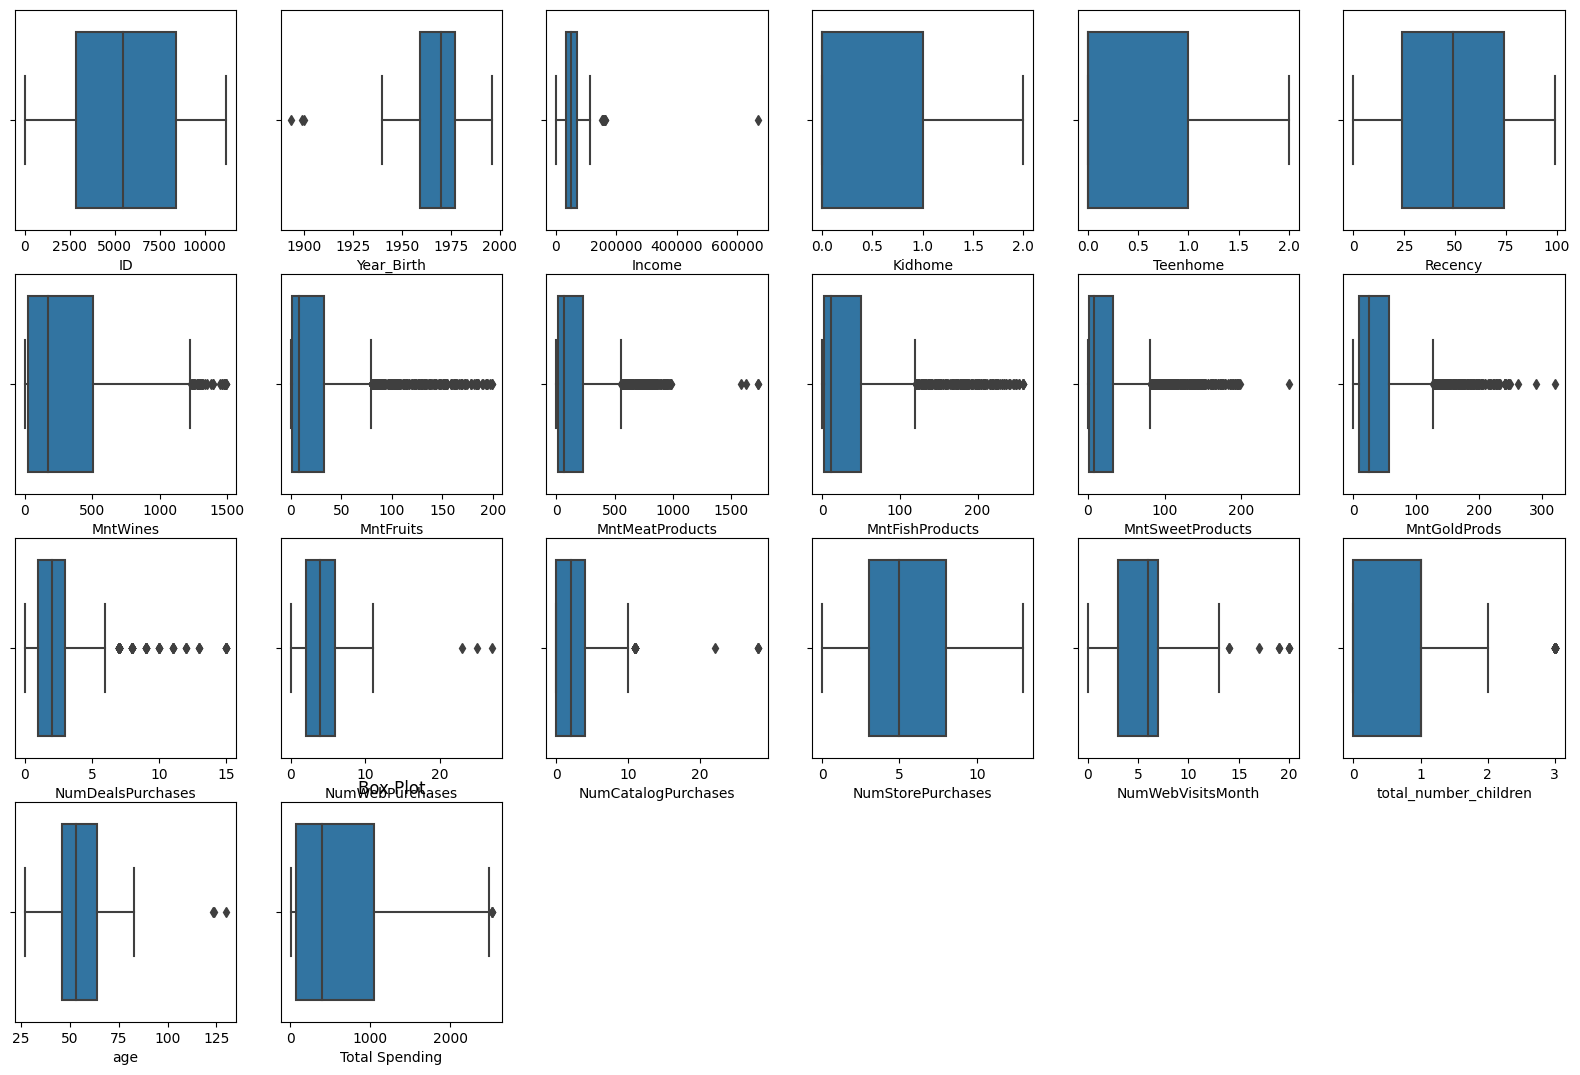

In [69]:
taple_with_numeric=df.select_dtypes(include=['float64','int64'])
fig_name=taple_with_numeric.columns
plt.figure(figsize=(20,20))
for i,col in enumerate (fig_name):
    plt.subplot(6,6,i+1)
    sns.boxplot(x=df[col],orient='y')
plt.title('Box Plot')
plt.show()

In [70]:
print('before',df.shape)
numaric_to_handel = ['Year_Birth','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'
,'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth','total_number_children','age','Total Spending']
for column in numaric_to_handel:
    mean = df[column].mean()
    std = df[column].std()

    # Define the threshold for outliers
    threshold = 3

    # Identify outliers
    outliers = df[(df[column] > mean + threshold * std) | (df[column] < mean - threshold * std)]

    # Remove outliers
    df = df.drop(outliers.index)
df.shape

before (2212, 31)


(1819, 31)

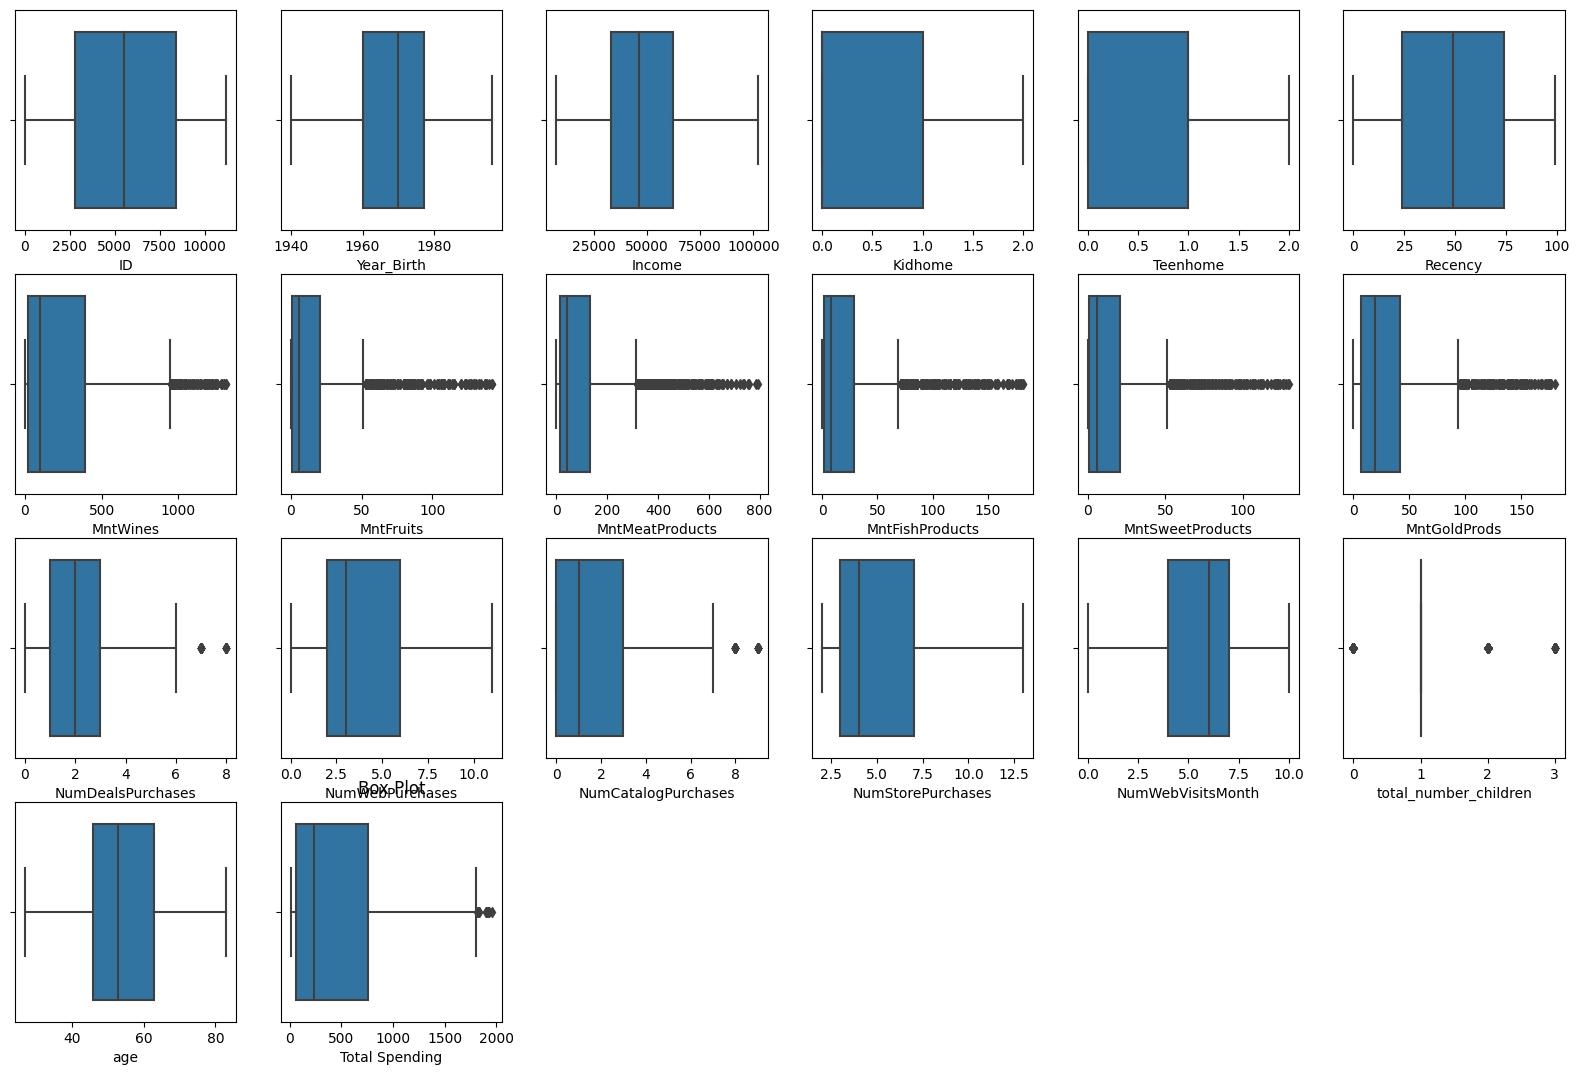

In [71]:
taple_with_numeric=df.select_dtypes(include=['float64','int64'])
fig_name=taple_with_numeric.columns
plt.figure(figsize=(20,20))
for i,col in enumerate (fig_name):
    plt.subplot(6,6,i+1)
    sns.boxplot(x=df[col],orient='y')
plt.title('Box Plot')
plt.show()

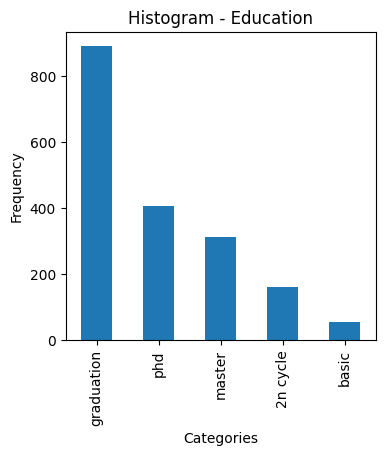

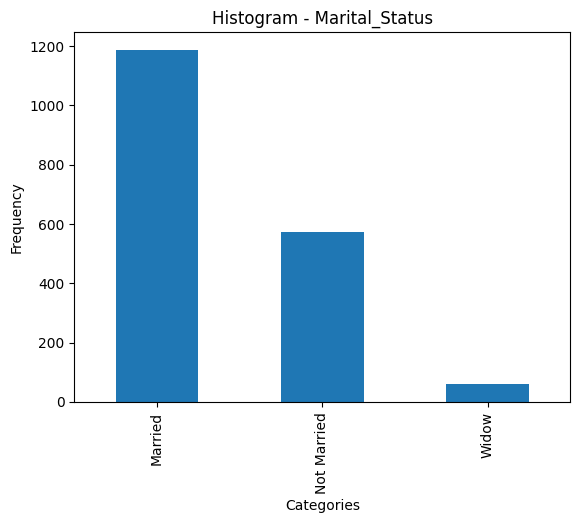

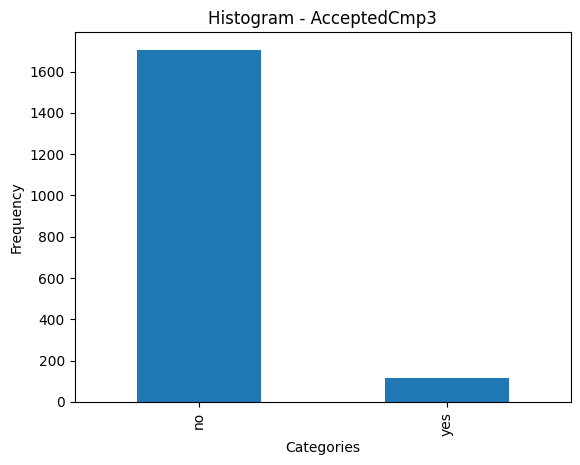

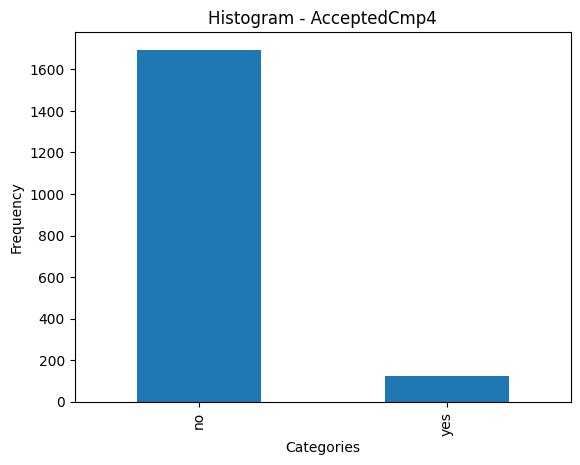

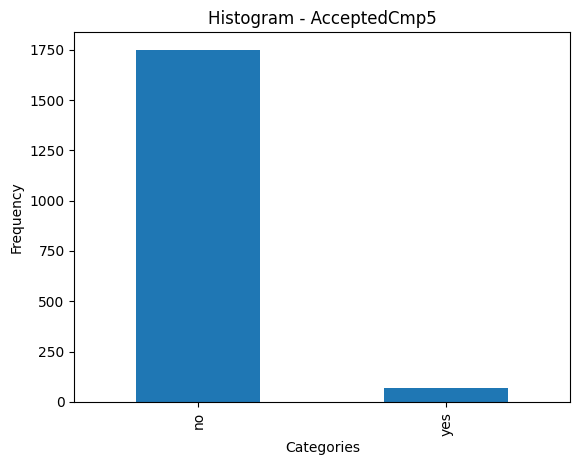

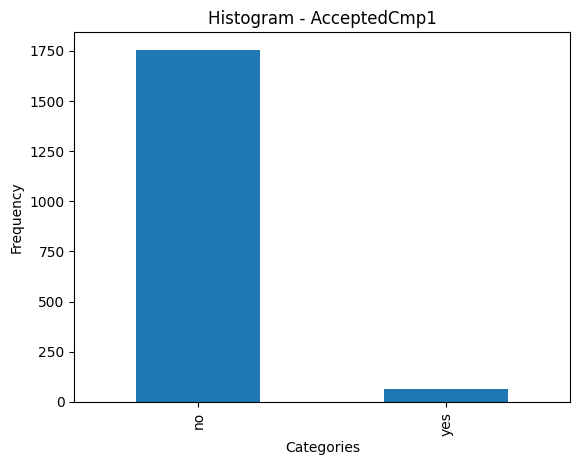

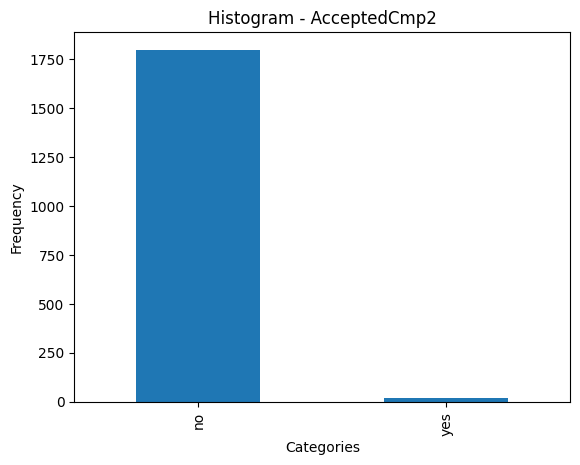

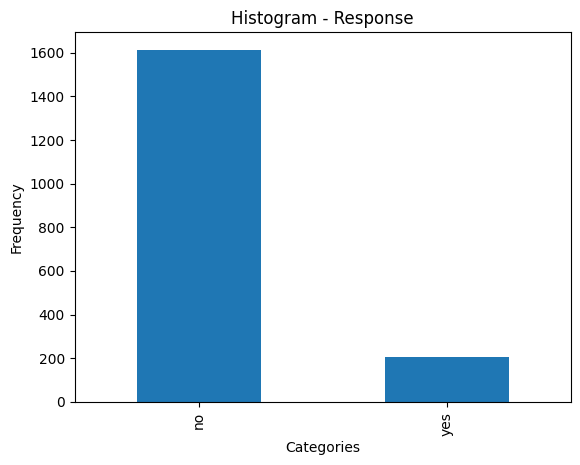

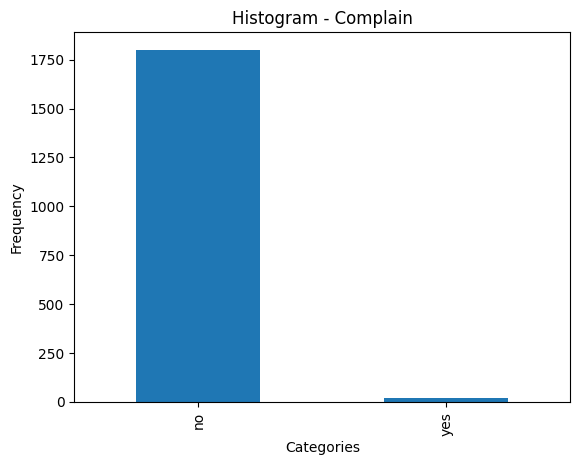

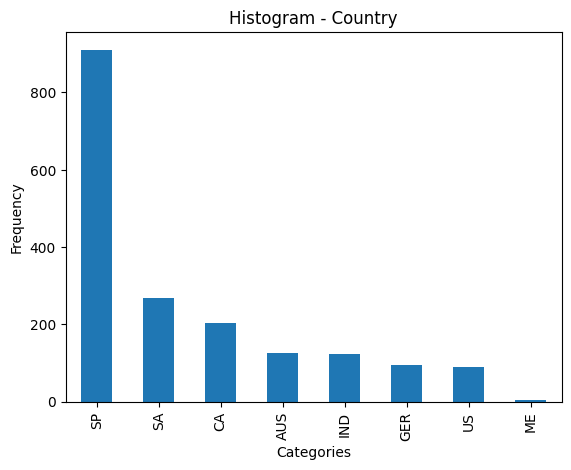

In [72]:
#columns_to_plot = ['Marital_Status', 'Education', 'Country']

# Set the figure size
plt.figure(figsize=(4, 4))

# Create histograms for each categorical column
for column in categorical_vars:
    # Compute the frequency counts for each category
    category_counts = df[column].value_counts()

    # Plot the histogram using a bar plot
    category_counts.plot(kind='bar')
    plt.title(f'Histogram - {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

In [73]:
print('before:',df.shape)
threshold = 5
for column in categorical_vars:
    # Calculate the frequency counts of each category
    category_counts = df[column].value_counts()

    # Identify unusual categories below the threshold
    unusual_categories = category_counts[category_counts < threshold].index

    # Alternatively, filter or exclude unusual categories
    df = df[~df[column].isin(unusual_categories)]
print('after:',df.shape)

before: (1819, 31)
after: (1816, 31)


Heatmap

### Create a heatmap to showcase the correlation between different pairs of variables.

C:\Users\cooc2\AppData\Local\Temp\ipykernel_21888\1210695776.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu');


Text(0.5, 1.0, 'Correlation Heatmap')

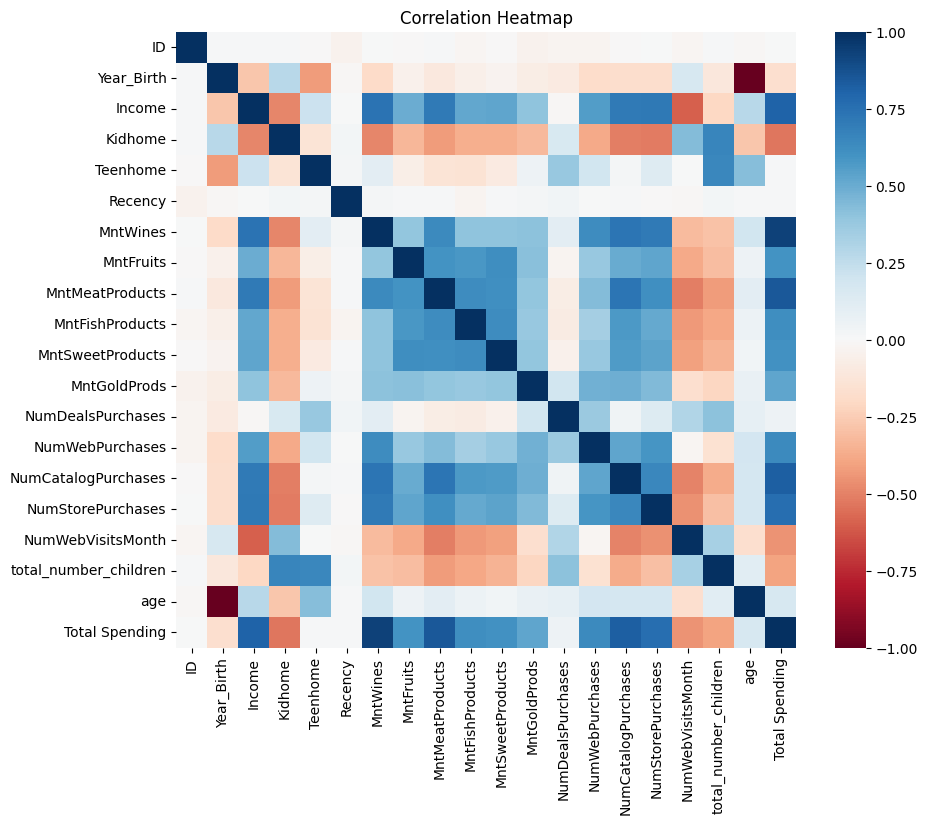

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='RdBu');
plt.title('Correlation Heatmap')


## Stage 3: Hypothesis Testing


### * Older people are not as tech-savvy and probably prefer shopping in-store.

In [75]:
# Filter data for older people
Older_people = df[df['age'] >= 55]

# Extract online and offline purchase data
Online = Older_people['NumWebPurchases']
Offline = Older_people['NumStorePurchases']

# Set the significance level
alpha = 0.05

# Perform a one-sided t-test for Online purchases being greater than Offline purchases
_, p_value = stats.ttest_ind(Offline, Online, alternative='greater')

# Output the p-value and interpret the results
print(f'p_value: {p_value}')
# print('p_value', p_value)

# Check if the p-value is less than or equal to alpha
if p_value <= alpha:
    print("It's true that the older people prefer shopping in store")
else:
    print("It's not true that the older people prefer shopping in store")


p_value: 1.6879694619391823e-31
It's true that the older people prefer shopping in store



### * Customers with kids probably have less time to visit a store and would prefer to shop online.


In [76]:
with_kid = df[df['total_number_children'] > 0]

Offline = with_kid['NumStorePurchases']
Online = with_kid['NumWebPurchases']

#stage 3.2
alpha = 0.05
_, p_value = stats.ttest_ind(Online, Offline ,alternative='greater')

# print(f'p_value: {p_value}')
print('p_value is: ', p_value)
if p_value <= alpha:
    print("Customers with kids perfer to shop online")
else:
    print("Customers with kids Dont perfer to shop online")

p_value is:  1.0
Customers with kids Dont perfer to shop online


### * Other distribution channels may cannibalize sales at the store.

In [77]:
web_and_catalog = df[(df['NumWebPurchases'] > 0) | (df['NumCatalogPurchases'] > 0)| (df['NumDealsPurchases'] > 0 ) ]

#stage 3.3.1
alpha = 0.05
_, p_value = stats.ttest_ind(web_and_catalog['NumStorePurchases'], df['NumStorePurchases'],alternative='greater')

print(f'p_value: {p_value}')
if p_value <= alpha:
    print("Other distribution channels cannibalize sales at the store")
else:
    print("Other distribution channels Dont cannibalize sales at the store")

p_value: 0.5
Other distribution channels Dont cannibalize sales at the store



### * Does the US fare significantly better than the rest of the world in terms of total purchases?

In [78]:
Country = df[df['Country'] == 'US']['Total Spending'] # only us country
Other_Countries = df[df['Country'] != 'US']['Total Spending'] # any other country except us

alpha = 0.05

# t_statistic, p_value = stats.ttest_ind(Country, Not_us_state, alternative='greater')
_, p_value = stats.ttest_ind(Country, Other_Countries, alternative='greater')

print(f'p_value: {p_value}')
if p_value <= alpha:
    print("The US fare in higher")
else:
    print("The US fare in NOT higher")

p_value: 0.2259227310533516
The US fare in NOT higher


In [79]:
Country = df[df['Country'] == 'US']

alpha = 0.05
_, p_value = stats.ttest_ind(Country['Total Spending'], df['Total Spending'],alternative='greater')

print(f'p_value: {p_value}')
if p_value <= alpha:
    print("The US fare in higher")
else:
    print("The US fare in NOT higher")

p_value: 0.23589087399510217
The US fare in NOT higher



## Stage 4: Data Visualization



### * Which products are performing the best, and which are performing the least in terms of revenue?


the max value is: 443825
the min value is: 30681


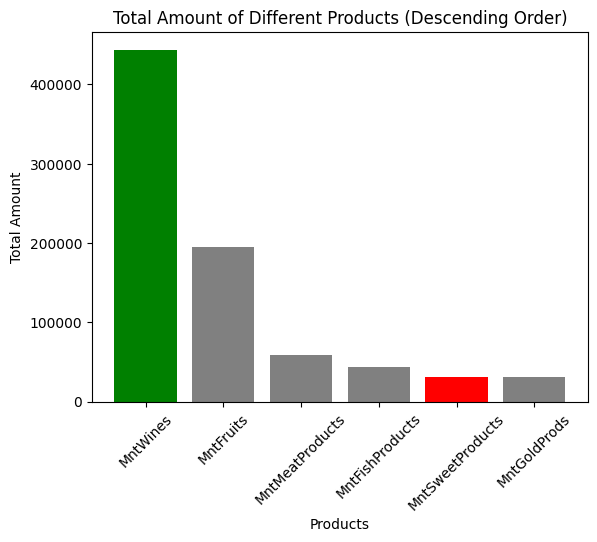

In [80]:
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sums = df[columns].sum()

# sort the sums list in descending order 
sort = sorted(sums, reverse=True)
# print(sort)
max_value = max(sums)
min_value = min(sums)
print(f'the max value is: {max_value}')
print(f'the min value is: {min_value}')
# give the max and min values different color (max is green & min is red).
colors = ['g' if i == max_value else 'r' if i == min_value else 'gray' for i in sums]
plt.bar(columns, sort, color=colors)
# Add labels and title
plt.xlabel('Products')
plt.ylabel('Total Amount')
plt.title('Total Amount of Different Products (Descending Order)')
# Rotate x-axis labels if needed
plt.xticks(rotation=45)
# Display the plot
plt.show()




### * Is there any pattern between the age of customers and the last campaign acceptance rate?


(20, 30]     1
(30, 40]    14
(40, 50]    17
(50, 60]    13
(60, 70]    16
(70, 80]     9
Name: age, dtype: int64


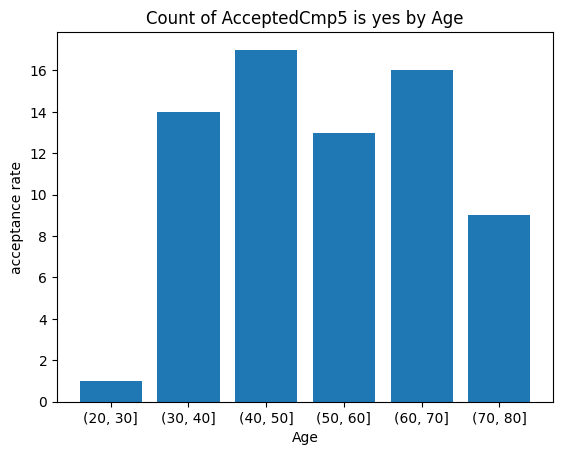

In [81]:

# Filter the DataFrame to include only rows where AcceptedCmp5 is 1 >> yes 
filtered_df = df[df['AcceptedCmp5'] == 'yes']

# Count the occurrences of each age
# Define the age bins
age_bins = [20, 30, 40, 50, 60, 70, 80]

# Bin the 'Age' column into age groups
age_groups = pd.cut(filtered_df['age'], bins=age_bins)

# Count the occurrences of each age group
age_counts = age_groups.value_counts(sort=False)
print(age_counts)
# Create the bar plot
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel('Age')
plt.ylabel('acceptance rate')
plt.title('Count of AcceptedCmp5 is yes by Age')
plt.show()




### * Which Country has the greatest number of customers who accepted the last campaign?


SP     38
CA      9
SA      8
US      5
AUS     5
GER     3
IND     2
Name: Country, dtype: int64


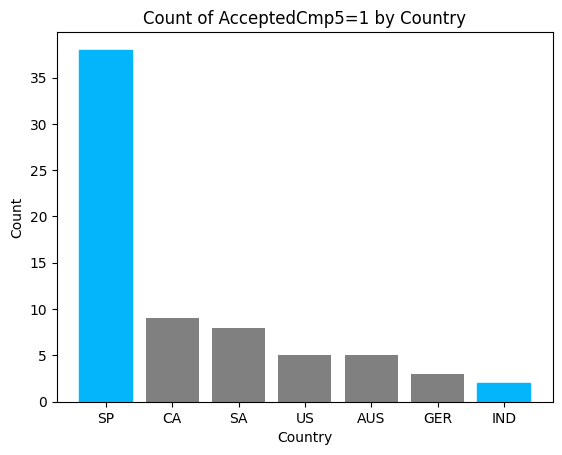

In [82]:

# Filter the DataFrame to include only rows where AcceptedCmp5 is 1 >> yes
filtered_df = df[df['AcceptedCmp5'] == 'yes']

# Count the occurrences of each country
country_counts = filtered_df['Country'].value_counts()
print(country_counts)
bars = plt.bar(country_counts.index, country_counts.values,color='gray')

# Find the index of the minimum and maximum values
min_index = np.argmin(country_counts.values)
max_index = np.argmax(country_counts.values)


# Set the color of the minimum and maximum bars
bars[min_index].set_color('#03b6fc')
bars[max_index].set_color('#03b6fc')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of AcceptedCmp5=1 by Country')
plt.show()




### * Do you see any pattern in the no. of children at home and total spend?


total_number_children
0    810.693767
1    410.070936
2    204.072727
3    211.021277
Name: Total Spending, dtype: float64


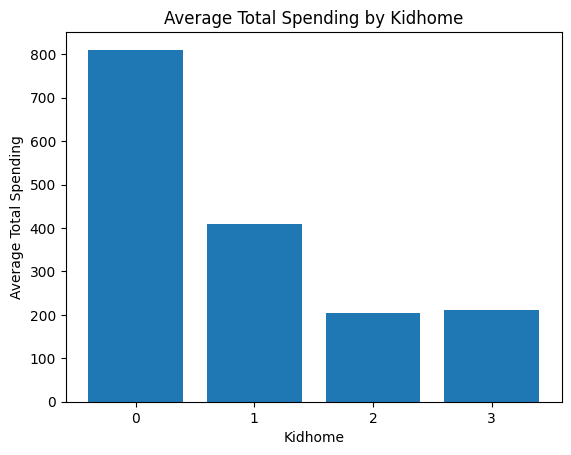

In [83]:

#grouped_data = df.groupby('Kidhome')['Total Spending'].mean()  # only kdis

grouped_data = df.groupby('total_number_children')['Total Spending'].mean() # total number of childern at home = kidhome + teenhome
print(grouped_data)
# Create a bar plot
plt.bar(grouped_data.index, grouped_data)
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])
# Add labels and title
plt.xlabel('Kidhome')
plt.ylabel('Average Total Spending')
plt.title('Average Total Spending by Kidhome')

# Show the plot
plt.show()






### * Education background of the customers who complained in the last 2 years.

graduation    14
master         2
2n cycle       2
phd            1
Name: Education, dtype: int64


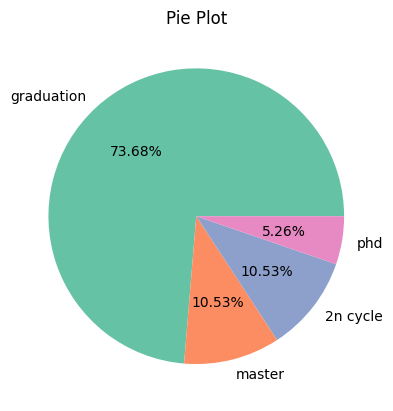

In [84]:
Complain_df = df[df['Complain'] == 'yes']
category_counts = Complain_df['Education'].value_counts()

print(category_counts)

colo=sns.color_palette('Set2')

# Extract the labels and values from the counts
labels = category_counts.index
values = category_counts.values

# Create a pie plot
plt.pie(values, labels = labels, colors = colo, autopct= '%.2f%%' )

# Add title
plt.title('Pie Plot')

# Show the plot
plt.show()